In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_curve, roc_auc_score, auc, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import IsolationForest, RandomForestClassifier

from imblearn.under_sampling import RandomUnderSampler, NearMiss, TomekLinks

The 'creditcard.csv' dataset contains credit card transactions made by European cardholders during September of 2013. The transactions span over a two day period, during which 492 fraudulent transactions were made. This dataset is highly imbalanced as the fraudulent transactions account for only 0.172% of all the transactions. 

This dataset has undergone a PCA (Principal Component Analysis) transformation, and as a result, it only contains numerical input variables. These variables a labelled V1, V2, V3, etc. Two features did not undergo a PCA transformation. These features are 'Time' and 'Amount'. 'Time' records the seconds elapsed between each transaction. 'Class' records whether the transaction is considered fraudulent or non-fraudulent, using the values of 1 and 0 respectively. 

In [3]:
df = pd.read_csv('creditcard.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


## Exploratory Data Analysis (EDA)

<Axes: title={'center': "Distribution of 'Class' variable"}, xlabel='Class', ylabel='count'>

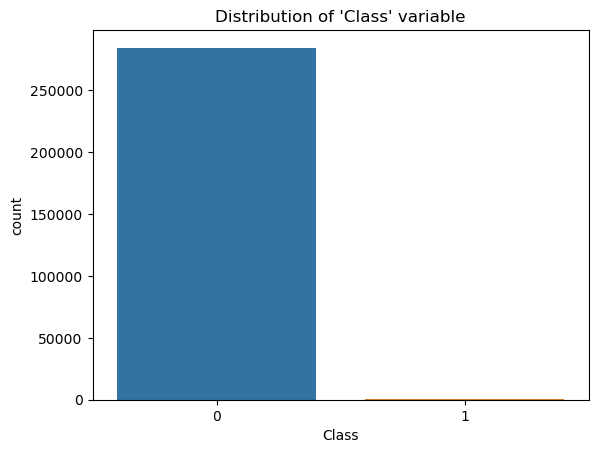

In [6]:
df['Class'].value_counts()
plt.title("Distribution of 'Class' variable")
sns.countplot(x=df['Class'], data=df)

<Axes: >

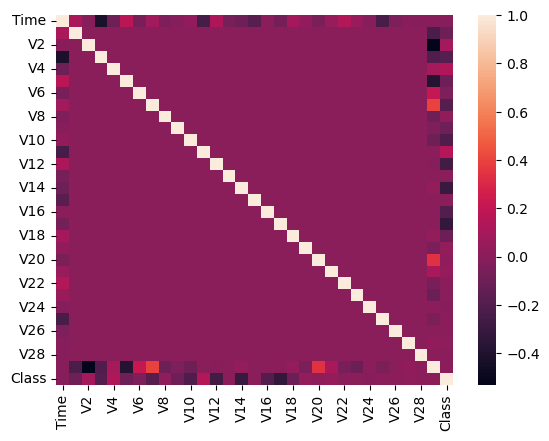

In [7]:
sns.heatmap(df.corr())

From the histogram below, we can see that the majority of fraudulent transactions were of smaller amounts. We can infer that is because larger transactional sums are more likely to be flagged as a fraudulent transaction. 

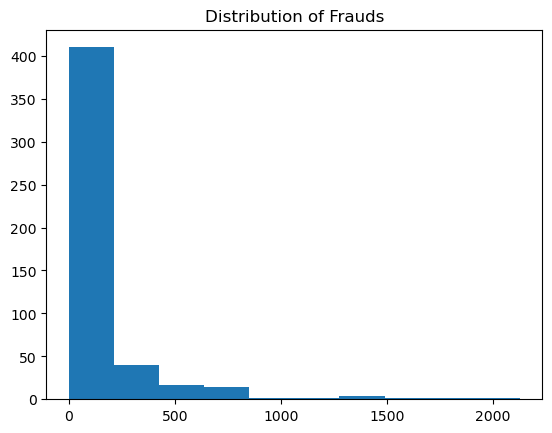

In [8]:
plt.hist(df['Amount'][df['Class']==1])
plt.title('Distribution of Frauds')
plt.show()

Below we can see that all non-fraudulent transactions are between 0 and 2500 euros. This further supports our inference as to why the majority of fraudulent transactions were of small sums. 

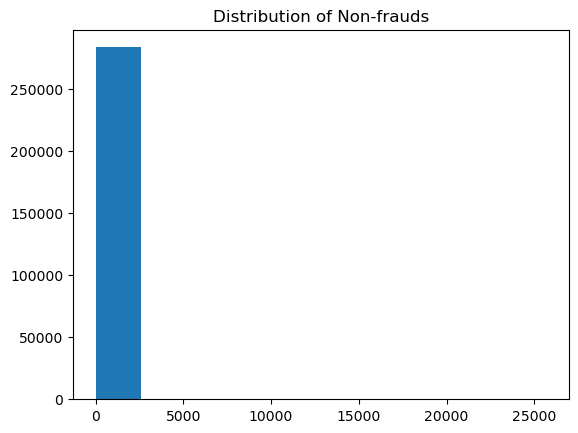

In [9]:
plt.hist(df['Amount'][df['Class']==0])
plt.title('Distribution of Non-frauds')
plt.show()

In [10]:
X = df.drop(columns=['Class'])
y = df['Class']

In [11]:
print(X.shape)
print(y.shape)

(284807, 30)
(284807,)


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Random Undersampling

In [13]:
rus = RandomUnderSampler(random_state=42)
X_train, y_train = rus.fit_resample(X, y)

### SVM 

In [14]:
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [15]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       492
           1       0.99      0.83      0.90       492

    accuracy                           0.91       984
   macro avg       0.92      0.91      0.91       984
weighted avg       0.92      0.91      0.91       984



In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85295
           1       0.11      0.81      0.20       148

    accuracy                           0.99     85443
   macro avg       0.56      0.90      0.60     85443
weighted avg       1.00      0.99      0.99     85443



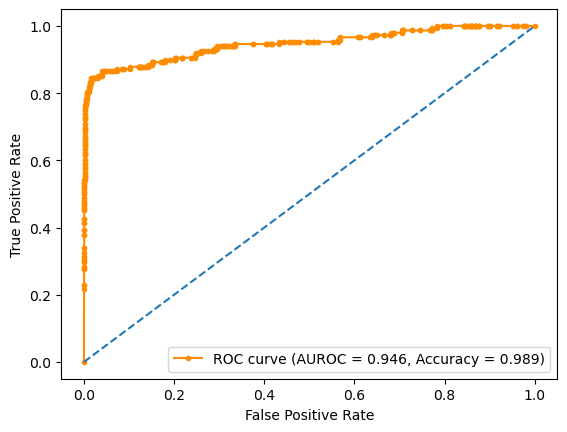

In [17]:
model_probs = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, model_probs)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, model_probs)
label = f"ROC curve (AUROC = {auc_score:.3f}, Accuracy = {accuracy:.3f})"
plt.plot(fpr, tpr, color='darkorange', marker='.', label=label)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()

### Isolation Forest

In [18]:
model = IsolationForest(n_estimators=100, contamination=0.5, random_state=42)
model.fit(X_train)

y_train_pred = model.predict(X_train)
y_train_pred = [1 if i == -1 else 0 for i in y_train_pred]

y_pred = model.predict(X_test)
y_pred = [1 if i == -1 else 0 for i in y_pred]

In [19]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76       492
           1       0.76      0.76      0.76       492

    accuracy                           0.76       984
   macro avg       0.76      0.76      0.76       984
weighted avg       0.76      0.76      0.76       984



In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.74      0.85     85295
           1       0.01      0.77      0.01       148

    accuracy                           0.74     85443
   macro avg       0.50      0.76      0.43     85443
weighted avg       1.00      0.74      0.85     85443



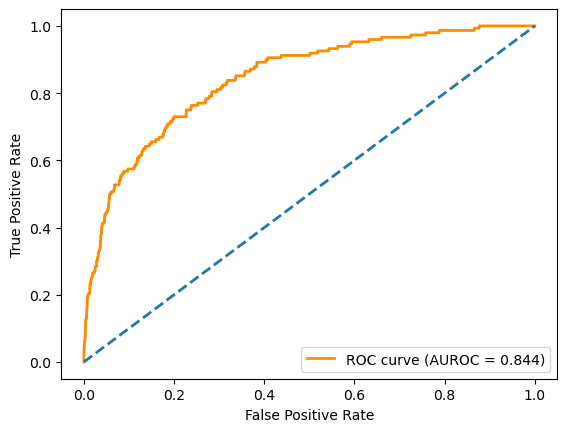

In [21]:
y_scores = model.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, -y_scores)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUROC = {:.3f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

### Random Forest

In [22]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [23]:
y_train_pred = model.predict(X_train)

y_pred = model.predict(X_test)

In [24]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       492
           1       1.00      0.98      0.99       492

    accuracy                           0.99       984
   macro avg       0.99      0.99      0.99       984
weighted avg       0.99      0.99      0.99       984



In [ ]:
print(classification_report(y_test, y_pred))

## Near-Miss Undersampling 

In [26]:
nearmiss = NearMiss(version=3)
X_train, y_train = nearmiss.fit_resample(X, y)

In [ ]:
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

In [ ]:
classification_report(y_train, y_train_pred)

In [ ]:
classification_report(y_test, y_pred)

In [ ]:
model_probs = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, model_probs)
accuracy = accuracy_score(y_test, y_pred)
fpr, tpr, _ = roc_curve(y_test, model_probs)
label = f"ROC curve (AUROC = {auc_score:.3f}, Accuracy = {accuracy:.3f})"
plt.plot(fpr, tpr, color='darkorange', marker='.', label=label)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = "lower right")
plt.show()

## Tomek Links

In [ ]:
tomeklinks = TomekLinks()
X_train, y_train = tomeklinks.fit_resample(X, y)

In [1]:
model = SVC(kernel='linear', probability=True, random_state=42)
model.fit(X_train, y_train)

y_train_pred = model.predict(X_train)
y_pred = model.predict(X_test)

NameError: name 'SVC' is not defined

In [ ]:
classification_report(y_train, y_train_pred)

In [ ]:
classification_report(y_test, y_pred)